# Coarsen Loon

In [104]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/loon/non_orographic_flights.csv')


In [128]:
segment = df[df.segment_id == 112]

In [131]:
segment

,flight_id,time,latitude,longitude,altitude,pressure,wind_u,wind_v,T_cosmic,dTdz_cosmic,...,flux_east_LF,flux_west_LF,flux_north_LF,flux_south_LF,month,year,grid_cell_number,dt_start,dt_end,abs_flux_zonal
785762,I-160,2014-03-03 04:30:52.009,-47.659222,-179.997695,20553.400296,52.309936,10.173795,-4.741001,-56.254808,0.000914,...,0.000715,-0.000198,0.000998,-0.000131,3,2014,288.0,47.533333,409.900000,0.003712
785763,I-160,2014-03-03 04:32:52.009,-47.664151,-179.987074,20556.212375,52.314410,10.422861,-4.290024,-56.252238,0.000914,...,0.000714,-0.000201,0.000987,-0.000133,3,2014,288.0,47.566667,409.866667,0.003738
785764,I-160,2014-03-03 04:34:52.009,-47.668608,-179.965647,20560.631519,52.317232,10.720431,-3.700336,-56.248200,0.000913,...,0.000714,-0.000204,0.000977,-0.000136,3,2014,288.0,47.600000,409.833333,0.003830
785765,I-160,2014-03-03 04:36:52.009,-47.672209,-179.947043,20560.031911,52.329770,10.861671,-3.337833,-56.248749,0.000913,...,0.000714,-0.000207,0.000969,-0.000138,3,2014,288.0,47.633333,409.800000,0.003941
785766,I-160,2014-03-03 04:38:52.009,-47.675092,-179.929309,20552.003241,52.370628,10.944855,-3.069037,-56.256091,0.000915,...,0.000712,-0.000210,0.000959,-0.000141,3,2014,288.0,47.666667,409.766667,0.003982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795969,I-160,2014-03-20 04:14:52.009,-54.244603,37.141027,20071.463672,52.816475,12.816543,-13.640688,-53.121509,0.000608,...,0.000125,-0.002655,0.001968,-0.002643,3,2014,273.0,455.266667,2.166667,0.003160
795970,I-160,2014-03-20 04:16:52.009,-54.259360,37.164638,20071.703067,52.809969,12.877634,-13.811122,-53.115295,0.000607,...,0.000131,-0.002645,0.001979,-0.002647,3,2014,273.0,455.300000,2.133333,0.003155
795971,I-160,2014-03-20 04:18:52.009,-54.274423,37.189270,20077.609756,52.750902,12.900941,-13.964151,-53.075968,0.000602,...,0.000136,-0.002635,0.001989,-0.002651,3,2014,273.0,455.333333,2.100000,0.003154
795972,I-160,2014-03-20 04:20:52.009,-54.289573,37.213640,20081.693860,52.710061,12.909989,-14.057562,-53.048776,0.000594,...,0.000142,-0.002625,0.001998,-0.002654,3,2014,273.0,455.366667,2.066667,0.003160


<Axes: xlabel='time'>

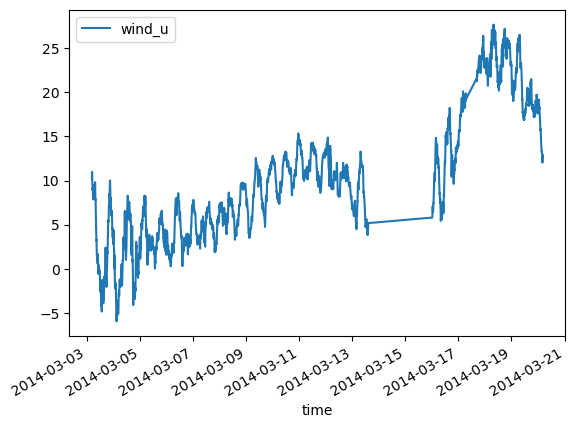

In [ ]:
segment.plot(x='time',y='wind_u')

In [135]:
segment.plot(x='time',y='wind_w')

KeyError: 'wind_w'

<Axes: xlabel='time'>

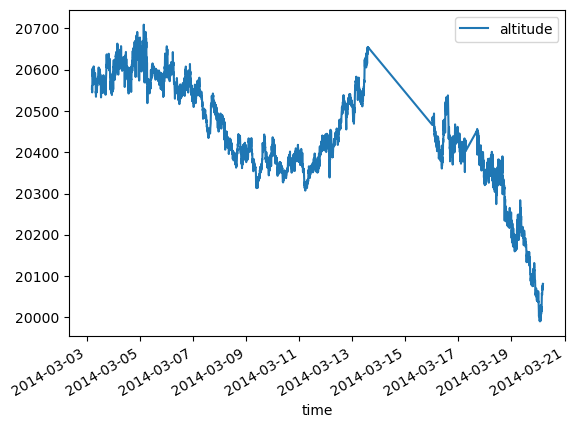

In [139]:
segment.plot(x='time',y='altitude')

In [106]:
df['time'] = pd.to_datetime(df.time,format='ISO8601')

In [ ]:
df['abs_flux_zonal'] = df['flux_east'] - df['flux_west']


<Axes: xlabel='time'>

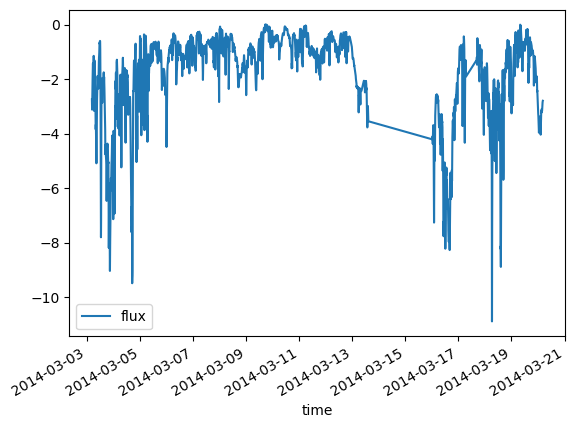

In [ ]:
df[df.segmend == 112].assign(flux=lambda d: d['flux_west'] * 1000).plot(x='time', y='flux')

In [ ]:
df[df['segment_id'] == 112]['flux']

,flight_id,time,latitude,longitude,altitude,pressure,wind_u,wind_v,T_cosmic,dTdz_cosmic,...,flux_east_LF,flux_west_LF,flux_north_LF,flux_south_LF,month,year,grid_cell_number,dt_start,dt_end,abs_flux_zonal
785762,I-160,2014-03-03 04:30:52.009,-47.659222,-179.997695,20553.400296,52.309936,10.173795,-4.741001,-56.254808,0.000914,...,0.000715,-0.000198,0.000998,-0.000131,3,2014,288.0,47.533333,409.900000,0.003712
785763,I-160,2014-03-03 04:32:52.009,-47.664151,-179.987074,20556.212375,52.314410,10.422861,-4.290024,-56.252238,0.000914,...,0.000714,-0.000201,0.000987,-0.000133,3,2014,288.0,47.566667,409.866667,0.003738
785764,I-160,2014-03-03 04:34:52.009,-47.668608,-179.965647,20560.631519,52.317232,10.720431,-3.700336,-56.248200,0.000913,...,0.000714,-0.000204,0.000977,-0.000136,3,2014,288.0,47.600000,409.833333,0.003830
785765,I-160,2014-03-03 04:36:52.009,-47.672209,-179.947043,20560.031911,52.329770,10.861671,-3.337833,-56.248749,0.000913,...,0.000714,-0.000207,0.000969,-0.000138,3,2014,288.0,47.633333,409.800000,0.003941
785766,I-160,2014-03-03 04:38:52.009,-47.675092,-179.929309,20552.003241,52.370628,10.944855,-3.069037,-56.256091,0.000915,...,0.000712,-0.000210,0.000959,-0.000141,3,2014,288.0,47.666667,409.766667,0.003982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795969,I-160,2014-03-20 04:14:52.009,-54.244603,37.141027,20071.463672,52.816475,12.816543,-13.640688,-53.121509,0.000608,...,0.000125,-0.002655,0.001968,-0.002643,3,2014,273.0,455.266667,2.166667,0.003160
795970,I-160,2014-03-20 04:16:52.009,-54.259360,37.164638,20071.703067,52.809969,12.877634,-13.811122,-53.115295,0.000607,...,0.000131,-0.002645,0.001979,-0.002647,3,2014,273.0,455.300000,2.133333,0.003155
795971,I-160,2014-03-20 04:18:52.009,-54.274423,37.189270,20077.609756,52.750902,12.900941,-13.964151,-53.075968,0.000602,...,0.000136,-0.002635,0.001989,-0.002651,3,2014,273.0,455.333333,2.100000,0.003154
795972,I-160,2014-03-20 04:20:52.009,-54.289573,37.213640,20081.693860,52.710061,12.909989,-14.057562,-53.048776,0.000594,...,0.000142,-0.002625,0.001998,-0.002654,3,2014,273.0,455.366667,2.066667,0.003160


In [109]:

flights = []
for flight in df['segment_id'].unique():
    ## this is bad code, but it works
    flight_df = df[df['segment_id'] == flight]
    flight_df = flight_df.resample('D',on='time').agg({
    'latitude': 'mean',     # sum this column
    'longitude': 'mean',    # average this column
    'flux_east': 'mean',
    'flux_west': 'mean',
    'flux_north':'mean',
    'flux_south':'mean', 
    'abs_flux_zonal':'mean'   # take first value
    })
    flight_df['flight_id'] = flight
    flight_df = flight_df.set_index([flight_df.index,'flight_id'])

    flights.append(flight_df)
coarsen_flights = pd.concat(flights)
coarsen_flights = coarsen_flights.dropna()

In [110]:
coarsen_flights.to_csv('data/loon/coarsen_flights_nonoro_daily.csv')

In [111]:
eastern_flux_coarse_mean = coarsen_flights['flux_east'].to_numpy()*1000
eastern_flux = df['flux_east'].to_numpy()*1000

western_flux_coarse_mean = coarsen_flights['flux_west'].to_numpy()*1000
western_flux = df['flux_west'].to_numpy()*1000


net_zonal_flux = eastern_flux + western_flux
abs_zonal_flux_mean = np.abs(western_flux_coarse_mean) + np.abs(eastern_flux_coarse_mean)
abs_zonal_flux = np.abs(western_flux) + np.abs(eastern_flux)





eastern_flux = eastern_flux[eastern_flux > 0]   
eastern_flux_coarse_mean = eastern_flux_coarse_mean[eastern_flux_coarse_mean > 0]   

net_zonal_flux = net_zonal_flux[net_zonal_flux > 0]
abs_zonal_flux = abs_zonal_flux[abs_zonal_flux > 0]
abs_zonal_flux_mean = abs_zonal_flux_mean[abs_zonal_flux_mean > 0]



In [112]:
len(abs_zonal_flux_mean)

3670

Text(0.5, 0, 'log10(GW Eastward Flux) [mPa]')

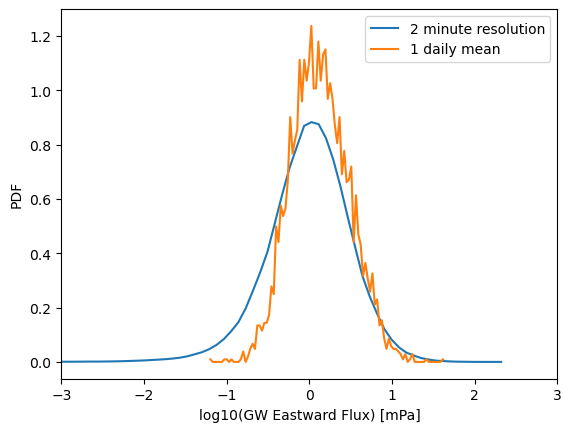

In [113]:
import matplotlib.pyplot as plt 
import numpy as np



native_hist,native_edges = np.histogram(np.log10(eastern_flux),bins=100,density=True)
native_centers = (native_edges[:-1] + native_edges[1:])/2

coarsen_mean_hist,coarsen_mean_edges = np.histogram(np.log10(eastern_flux_coarse_mean),bins=100,density=True)
coarsen_mean_centers = (coarsen_mean_edges[:-1] + coarsen_mean_edges[1:])/2

plt.plot(native_centers,native_hist, label='2 minute resolution')
plt.plot(coarsen_mean_centers,coarsen_mean_hist, label='1 daily mean')
plt.legend()
plt.xlim(-3,3)
plt.ylabel("PDF")
plt.xlabel("log10(GW Eastward Flux) [mPa]")

Text(0, 0.5, 'PDF')

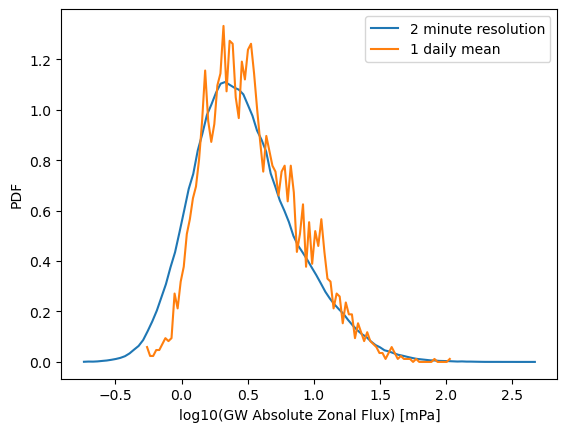

In [114]:
native_total, native_edges = np.histogram(np.log10(abs_zonal_flux),bins=100,density=True)
native_centers = (native_edges[:-1] + native_edges[1:])/2
coarsen_mean_total, coarsen_mean_edges = np.histogram(np.log10(abs_zonal_flux_mean),bins=100,density=True)
coarsen_mean_centers = (coarsen_mean_edges[:-1] + coarsen_mean_edges[1:])/2
plt.plot(native_centers,native_total, label='2 minute resolution')
plt.plot(coarsen_mean_centers,coarsen_mean_total, label='1 daily mean')

plt.legend()
plt.xlabel("log10(GW Absolute Zonal Flux) [mPa]")
plt.ylabel("PDF")